In [ ]:
#@title 


%%HTML
<div style="text-align:center; display:flex; justify-content:space-between;">
<div style="width:25%; height:150px; display: flex;">

<img src="https://giecaruff.github.io/sites/gss_semana_2020/logos/GSS_semana_geofisica.png" height="40%">

</div>
<div style="width:50%; height:150px; text-align:center;">

<br><br>

<span style="color:purple; font-size: 16pt;">Minicurso Python para Geofísicos <br></span>
<span style="color:purple; font-size: 25pt;font-weight: bold;"> Poço Sintético </span>

</div>

<div style="width:25%; height:150px; text-align:right">
<img src="https://giecaruff.github.io/sites/gss_semana_2020/logos/logo_colorida_icone.png" height="60%">
</div>
</div>

<div>
<center> <span style="color:purple; font-size: 25pt;font-weight: bold;center">Equipe:</span>
<br><br>

<div style="width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Fernando Vizeu</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/vizeu.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">fernandovizeu@id.uff.br</span> </div>
<div style="width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Mário Martins</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/mario_machine.png" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">mario_martins@id.uff.br</span> </div>
<div style="width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Rodrigo Mota</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/rodrigo_dutra.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">dutrarodrigo@id.uff.br</span> </div>
<div style="white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Rodrigo Bijani</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/rodrigo_bijani.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">rodrigobijani@id.uff.br</span> </div>

</div>

# Referências:

[GeostatsGuy Lectures - 10d Data Analytics: Variogram Calculation](https://www.youtube.com/watch?v=mzPLicovE7Q)

[Edward Isaaks - What the Heck is a Variogram?](https://www.youtube.com/watch?v=SJLDlasDLEU)

Isaaks e Srivastava (1989) Applied Geostatistics

In [ ]:
!pip install pykrige
!pip install gstools

import numpy as np
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
import gstools as gs
import matplotlib.pyplot as plt

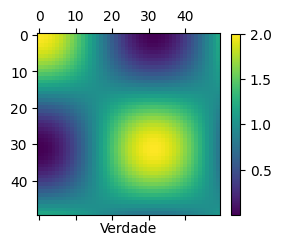

In [ ]:
gridagem = (50,50)

informacao_verdadeira = np.zeros(gridagem)

for x in range (gridagem[1]):
    for y in range(gridagem[0]):
        #informacao_verdadeira[y,x] = (x + y)/45.0 # Equacao 1 (V1 )
        informacao_verdadeira[y,x] = 1.0000 + np.cos(x/10.0000)*np.cos(y/10.0000) # Equacao 2 (V2)
        #informacao_verdadeira[y,x] = 0.5859 + np.sqrt(np.cos(x/10.0000)**2 + np.cos(y/10.0000)**2) # Equacao 3 (V3)
        #informacao_verdadeira[y,x] = np.random.normal(0.0,10.0)

#--------------------------------------------------------------------------------------------------------------#

fig, ax = plt.subplots(figsize=(10, 3), dpi=100)

ax1 = plt.subplot(131)
im = ax1.matshow(informacao_verdadeira,vmin=np.min(informacao_verdadeira), vmax=np.max(informacao_verdadeira)) # informacao_verdadeira
plt.xlabel('Verdade')

fig.colorbar(im, shrink=0.8)
plt.show()

In [ ]:
#from IPython.display import HTML
#HTML('<iframe src="https://www.youidraw.com/apps/painter/" width=800 height=600></iframe>')

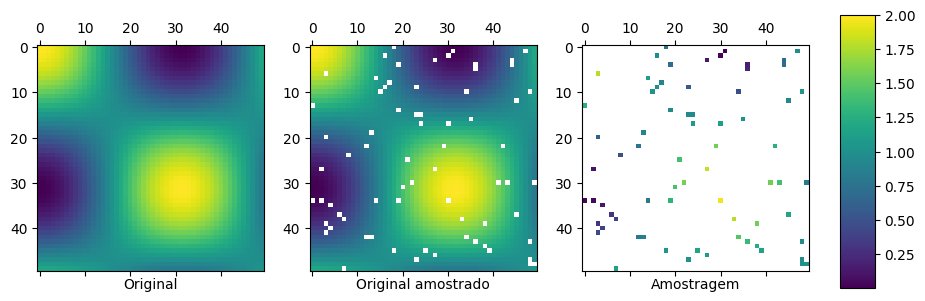

In [ ]:
# amostragem mais realista

#-------------------------------------------------------------------------------
semente = 100 # numeros pseudo-randomicos escolha o valor best 63
amostragem = 70  # numero de amostras "coletadas, pontos no mapa amostrados"
#-------------------------------------------------------------------------------

np.random.seed(semente)

X = []
Y = []

scale = 1

for i in range (amostragem):
    X.append(np.random.randint(0,gridagem[1])) # coordenadas x
    Y.append(np.random.randint(0,gridagem[0])) # coordenadas y

localizacao_amostras = informacao_verdadeira.copy()
amostras = np.zeros(gridagem)

amostras.fill(np.nan)

V = []
for i in range (len(X)):
    V.append(informacao_verdadeira[Y[i],X[i]]) # valor da propriedade
    localizacao_amostras[Y[i],X[i]] = np.nan
    amostras[Y[i],X[i]] = informacao_verdadeira[Y[i],X[i]]

#--------------------------------------------------------------------------------------------------------------#
fig, ax = plt.subplots(figsize=(10, 3), dpi=100)

ax1 = plt.subplot(131)
im = ax1.matshow(informacao_verdadeira,vmin=np.min(informacao_verdadeira), vmax=np.max(informacao_verdadeira))
plt.xlabel('Original')

ax2 = plt.subplot(132) # creates second axis
im = ax2.matshow(localizacao_amostras,vmin=np.min(informacao_verdadeira),vmax=np.max(informacao_verdadeira))
plt.xlabel('Original amostrado')

ax3 = plt.subplot(133) # creates second axis
im = ax3.matshow(amostras,vmin=np.min(informacao_verdadeira), vmax=np.max(informacao_verdadeira))
plt.xlabel('Amostragem')

# =================================================== #

fig.tight_layout()
fig.subplots_adjust(right=0.825)
cax = fig.add_axes([0.85, 0.06, 0.035, 0.91])
fig.colorbar(im, cax=cax, shrink=0.37)

plt.show()

## Exercício 1: 

### a) Calcular as propriedades para toda a área usando o inverso da potência das distâncias (10a potência).

### b) Ver o que acontece ao mudar a potência de 10 para 1, para 50 e para 100

### v v v Equação para o inverso da distância ponderado v v v

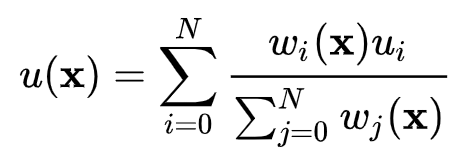

### Ponderações:

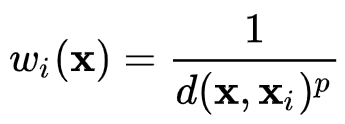

In [ ]:
# Exercício 1 - Dica

# Nossas variáveis: X (coordenadas x), Y (coordenadas y), e V (propriedade).
# ponto "p" arbitrário: px = 30, py = 20, pv = ?

# ==================================== #
ponto_teste = (1,30) # lembrando do GRID (Y,X)
# ==================================== #

n = len(V)

P = 10

pv_a = []
pv_b = []
for i in range(n):
    distancia_euclideana = np.sqrt(((X[i] - ponto_teste[0])**2) + ((Y[i] - ponto_teste[1])**2))
    pv_a.append((1.0/(distancia_euclideana**P))*V[i])
    pv_b.append((1.0/(distancia_euclideana**P)))

print("p =",sum(pv_a)/sum(pv_b))


p = 0.10526008177475367


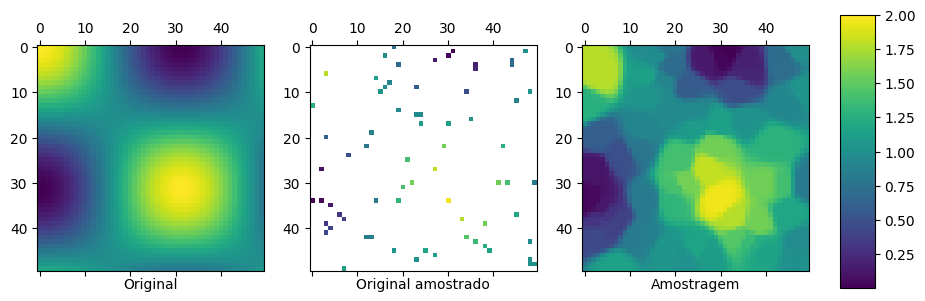

In [ ]:
# Resposta Exercício 1

def inverso_potencia_dist(px,py,X,Y,V,potencia = 10):

    n = len(V)

    pv_a = []
    pv_b = []
    for i in range(n):
        distancia_euclideana = np.sqrt(((X[i] - px)**2) + ((Y[i] - py)**2)) + 0.0001 # bias
        pv_a.append((1.0/(distancia_euclideana**potencia))*V[i])
        pv_b.append((1.0/(distancia_euclideana**potencia)))

    return sum(pv_a)/sum(pv_b)

# ---------------------------------------------------------------------------- #

modelo_dist_pond = np.zeros(gridagem)

for x in range(gridagem[1]):
    for y in range(gridagem[0]):
        modelo_dist_pond[y,x] = inverso_potencia_dist(x,y,X,Y,V,7)

#--------------------------------------------------------------------------------------------------------------#
fig, ax = plt.subplots(figsize=(10, 3), dpi=100)

ax1 = plt.subplot(131)
im = ax1.matshow(informacao_verdadeira,vmin=np.min(informacao_verdadeira), vmax=np.max(informacao_verdadeira))
plt.xlabel('Original')

ax2 = plt.subplot(132) # creates second axis
im = ax2.matshow(amostras,vmin=np.min(informacao_verdadeira),vmax=np.max(informacao_verdadeira))
plt.xlabel('Original amostrado')

ax3 = plt.subplot(133) # creates second axis
im = ax3.matshow(modelo_dist_pond,vmin=np.min(informacao_verdadeira), vmax=np.max(informacao_verdadeira))
plt.xlabel('Amostragem')

# =================================================== #

fig.tight_layout()
fig.subplots_adjust(right=0.825)
cax = fig.add_axes([0.85, 0.06, 0.035, 0.91])
fig.colorbar(im, cax=cax, shrink=0.37)

plt.show()


## Relação Espacial

No nosso exemplo cada ponto amostrado é uma coordenada no mapa. O que acontece se estes pontos são muito próximos? Eles tendem a ser similares? E se eles estão distantes? Eles tendem a ser parecidos? São estas questões que as análises da relação espacial nos ajudam a entender.

## Variograma

O variograma é outra forma de se entender a relação espacial entre os elementos

A equação para o variograma é a seguinte:

$\gamma (h) = \frac{1}{2n} \sum_{i = 1}^{n} (Z_i - Z_{i+h})$

In [ ]:
from IPython.display import HTML
HTML('<iframe src="https://www.youidraw.com/apps/painter/" width=800 height=600></iframe>')

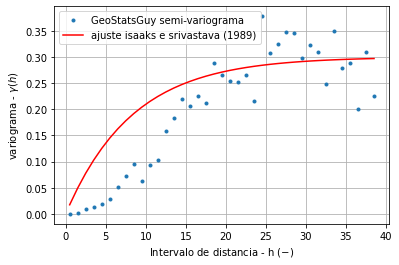

In [ ]:
bins = np.arange(40)

def variograma_ajuste_is(X,a,C1,C0): # ordinario - isaaks e srivastava (1989)
    """
    X = intervalos de profundidade (array)
    a = range (float)
    C0 = nugget (float)
    C1 = sill / Variância (float)
    """

    resultado = []
    for x in X:

        if x == 0:
            resultado.append(C0 + C1)
        else:
            expo = np.exp( (-3.0*abs(x))/a )
            res = C0 + (C1*(1 - expo))
            resultado.append(res)
    return resultado

bin_center, gamma = gs.vario_estimate_unstructured((X, Y), V, bins)

ajuste_IS1989 = variograma_ajuste_is(bin_center,25,0.30,0)

# =================================================== #

plt.plot(bin_center, gamma,'.', label="GeoStatsGuy semi-variograma")
plt.plot(bin_center, ajuste_IS1989,'r-', label="ajuste isaaks e srivastava (1989)")
plt.xlabel('Intervalo de distancia - h ($ - $)')
plt.ylabel('variograma - $\gamma (h)$')
plt.legend(loc=2)
plt.grid()
plt.show()

## Krigagem

A krigagem é o melhor  estimador linear não tendencioso ou BLUE do inglês (Best Linear Unbiased Estimator). Esse estimador segue a premissa de que o modelo gerado tem um "erro médio" zero e "variância do erro mínima". Ao minimizar a variância do erro juntamente com a condição de "média do erro = 0" em relação às ponderações, obtém-se o sitema linear abaixo onde:

#### C é a matriz com as covariâncias dos dados amostrados (variando de 1 a n).
#### W é o vetor de ponderações (que se deseja obter).
#### D é o vetor das covariâncias em relação ao ponto desejado (P no caso)

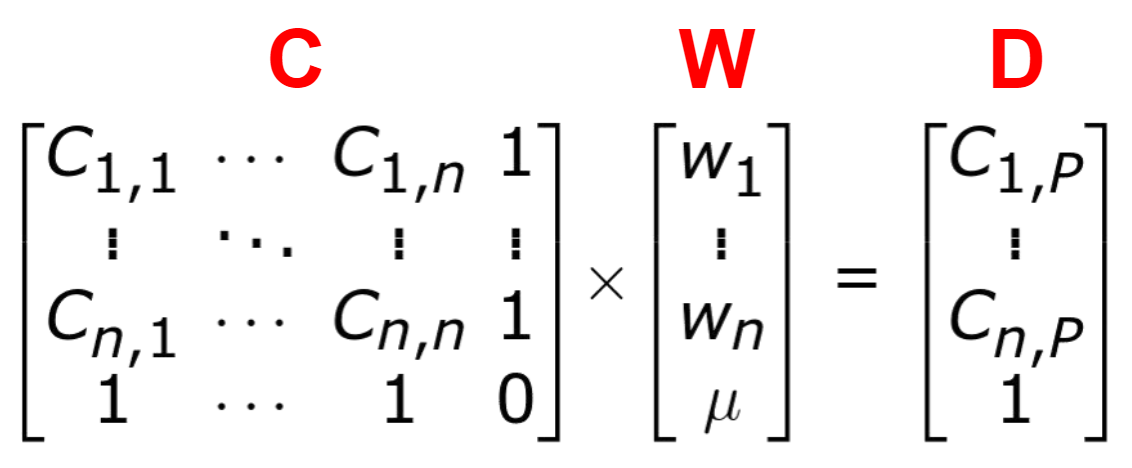

Onde cada elemento das matrizes C e D são calculados por

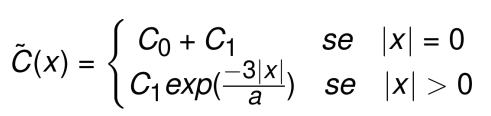

Onde x é a distância entre os pontos, e os parâmetros C0, C1 e a são obtidos à partir do variograma acima. O vetor de ponderações W é obtido através da relação inversa do sistema linear, ou seja, 

$ W = C^{-1} D $ 

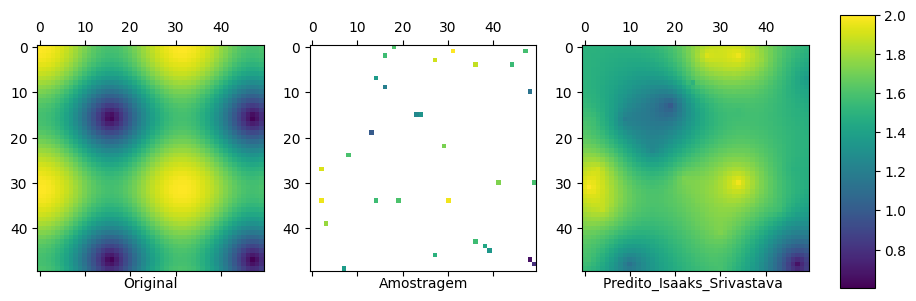

In [ ]:
def kri(y,x,X,Y,V,C0,C1,a,scale=1):
    
    AY2 = [y]+Y
    AX2 = [x]+X

    D = np.array([[0]*len(AY2)]*(len(AX2)),float)
    
    # D = Matriz de distancias 
    
    for j in range (len(AY2)):
        for i in range (len(AX2)):
            D[j,i] = scale*(np.sqrt((AY2[j] - AY2[i])**2 + (AX2[j] - AX2[i])**2))
            
            
    MC = np.array([[1]*(len(AX2))]*(len(AY2)),float)
    MC[len(AY2)-1,len(AX2)-1] = 0
    
    # MC = matriz de covariancias
    
    for j in range (len(AY2)-1):
        for i in range (len(AX2)-1):
            if D[j,i] == 0:
                MC[j,i] = C0 + C1
            else:
                MC[j,i] = C1*np.exp(-3*(D[j+1,i+1])/a)
                
    # NC = matriz de covariancias com o ponto
    
    NC = [1]*len(AX2)
    
    for i in range (1,len(AX2)):
        NC[i-1] = C1*np.exp(-3*(D[0,i])/a)
        
    # CI = inversa da matriz de covariancias
    
    CI = np.linalg.inv(MC)
    
    # W =  matriz de ponderacoes + parametro de lagrange
    
    W = np.dot(CI,NC)
    
    V0 = []
    for i in range (len(X)):
        V0.append(V[i]*W[i])
    
    VX0 = sum(V0)
    
    return(VX0)

#--------------------------------------------------------------------------------------------------------------#

krigagem_Isaaks_Srivastava = np.zeros(gridagem)

for x in range(gridagem[1]):
    for y in range(gridagem[0]):
        krigagem_Isaaks_Srivastava[y,x] = kri(x,y,X,Y,V,0,0.10,25)

#--------------------------------------------------------------------------------------------------------------#

fig, ax = plt.subplots(figsize=(10, 3), dpi=100)

ax1 = plt.subplot(131)
ax1.xaxis.set_ticks_position('bottom')
im = ax1.matshow(informacao_verdadeira,vmin=np.min(informacao_verdadeira), vmax=np.max(informacao_verdadeira))
plt.xlabel('Original')

ax2 = plt.subplot(132) # creates second axis
im = ax2.matshow(amostras,vmin=np.min(informacao_verdadeira), vmax=np.max(informacao_verdadeira))
plt.xlabel('Amostragem')

ax3 = plt.subplot(133) # creates second axis
im = ax3.matshow(krigagem_Isaaks_Srivastava,vmin=np.min(informacao_verdadeira),vmax=np.max(informacao_verdadeira))
plt.xlabel('Predito_Isaaks_Srivastava ')

# =================================================== #

fig.tight_layout()
fig.subplots_adjust(right=0.825)
cax = fig.add_axes([0.85, 0.06, 0.035, 0.91])
fig.colorbar(im, cax=cax, shrink=0.37)


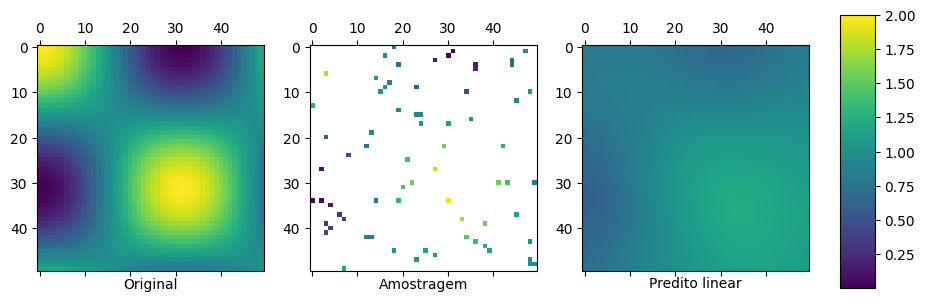

In [ ]:
variogramas = ["linear", "power", "gaussian", "spherical", "exponential", "hole-effect"]
indice = 0

"""
# linear  
    {'slope': slope, 'nugget': nugget}  
# power  
    {'scale': scale, 'exponent': exponent, 'nugget': nugget}  
# gaussian, spherical, exponential and hole-effect:  
    {'sill': s, 'range': r, 'nugget': n}  
# OR  
    {'psill': p, 'range': r, 'nugget': n}
"""

OK = OrdinaryKriging(
    X,
    Y,
    V,
    variogram_model=variogramas[indice],
    # variogram_parameters =
    verbose=False,
    enable_plotting=False,
)

grdx = np.linspace(0, gridagem[0], gridagem[0])
grdy = np.linspace(0, gridagem[1], gridagem[1])

z, ss = OK.execute("grid", grdy, grdx)

#--------------------------------------------------------------------------------------------------------------#

fig, ax = plt.subplots(figsize=(10, 3), dpi=100)

ax1 = plt.subplot(131)
ax1.xaxis.set_ticks_position('bottom')
im = ax1.matshow(informacao_verdadeira,vmin=np.min(informacao_verdadeira), vmax=np.max(informacao_verdadeira))
plt.xlabel('Original')

ax2 = plt.subplot(132) # creates second axis
im = ax2.matshow(amostras,vmin=np.min(informacao_verdadeira), vmax=np.max(informacao_verdadeira))
plt.xlabel('Amostragem')

ax3 = plt.subplot(133) # creates second axis
im = ax3.matshow(z,vmin=np.min(informacao_verdadeira),vmax=np.max(informacao_verdadeira))
plt.xlabel('Predito '+variogramas[indice])

# =================================================== #

fig.tight_layout()
fig.subplots_adjust(right=0.825)
cax = fig.add_axes([0.85, 0.06, 0.035, 0.91])
fig.colorbar(im, cax=cax, shrink=0.37)

plt.show()